# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится.

<b>Задача:</b> Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:  
сalls — количество звонков,  
minutes — суммарная длительность звонков в минутах,  
messages — количество sms-сообщений,  
mb_used — израсходованный интернет-трафик в Мб,  
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

### Задача

Перед нами задача классификации. В этой связи мы должны использовать модели классификации: дерево решений, случайный лес, логистическая регрессия

## Откройте и изучите файл

In [1]:
import pandas as pd
pd.options.display.max_columns = None
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
!pip install seaborn -U
import seaborn as sns
sns.set_theme(style="ticks")
from sklearn.dummy import DummyClassifier

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)


In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
display(df.head())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

In [5]:
display(df.describe())

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


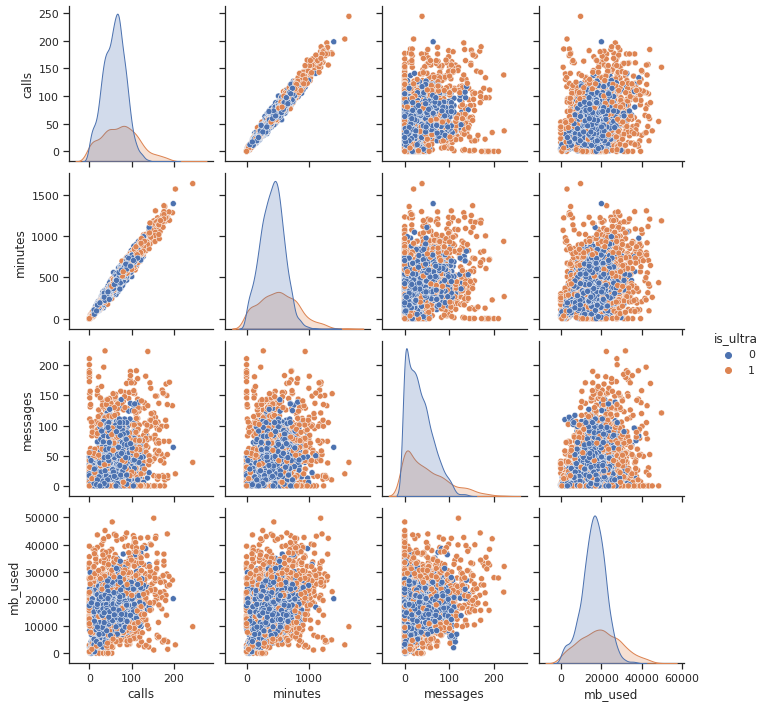

In [7]:
sns.pairplot(df, hue="is_ultra")

Между количеством звонков и количеством минут есть очень высокая корреляция (0.93). Ее также можно заметить на матрице графиков выше. Целесообразно избавиться от "дублирующего" атрибута.

In [8]:
df = df.drop('calls', axis=1)

Данные загружены и изучены.

## Разбейте данные на выборки

In [9]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

Разобьем исходные данные в соотношении 3:1:1.

In [10]:
features_general, features_test, target_general, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_general, target_general, test_size=0.25, random_state=12345)

## Исследуйте модели

### Дерево решений

In [11]:
best_dtc_model = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    dtc_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    dtc_model.fit(features_train, target_train)
    result = dtc_model.score(features_valid, target_valid)
    if result > best_result:
        best_dtc_model = dtc_model
        best_result = result
        best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("Максимальная глубина:", best_depth)

Accuracy наилучшей модели на валидационной выборке: 0.7682737169517885
Максимальная глубина: 7


77% верных ответов на валидационной выборке. Это уже больше 0.5

### Случайный лес

In [12]:
best_rfc_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 61, 10):
    for depth in range (1, 20):
        rfc_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rfc_model.fit(features_train, target_train) 
        result = rfc_model.score(features_valid, target_valid) 
        if result > best_result:
            best_rfc_model = rfc_model
            best_result = result
            best_est = est
            best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("Кол-во деревьев:", best_est)
print("Максимальная глубина:", best_depth)

Accuracy наилучшей модели на валидационной выборке: 0.7993779160186625
Кол-во деревьев: 60
Максимальная глубина: 10


Случайный лес показал результат лучше, чем дерево решений. Понадобилось 60 деревьев и большая глубина - 10.

### Логистическая регрессия

In [13]:
log_model = LogisticRegression(random_state=12345)
log_model.fit(features_train, target_train)
result = log_model.score(features_valid, target_valid)
print("Accuracy:", result)

Accuracy: 0.7013996889580093


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Логистическая регрессия показала себя наихудшим образом.

### Вывод

Ожидаемо наилучшей моделью оказался случайный лес - его и будем использовать на тестовой выборке.

## Проверьте модель на тестовой выборке

Для достижения наилучшего результата обучим еще раз нашу модель уже с учетом валидационной выборки.

In [14]:
model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=10)
model.fit(features_general, target_general)
model.score(features_test, target_test)

0.7962674961119751

Нам удалось получить модель, демонстрирующую почти на 80% строк правильную классификацию.

## (бонус) Проверьте модели на адекватность

In [16]:
df['is_ultra'].value_counts() / df.shape[0]

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

In [15]:
strategies = ['most_frequent']

dummy_results = []
for strategy in strategies:
    dc = DummyClassifier(strategy = strategy, random_state = 42)
    dc.fit(features_train, target_train)
    result = dc.score(features_test, target_test)
    dummy_results.append({strategy: result})
pd.DataFrame(dummy_results)

,most_frequent
0,0.695179


Наша модель дала нам почти 80% правильных ответов. Если бы у нас была "псевдомодель", которая расставляла бы целевой признак случайным образом на основании соотношения вариантов в обучающей модели, то мы бы могли получить 69,5% правильных прогнозов. То есть наша реальная модель работает лучше, чем случайно. 